In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
dataset = loadmat('face_emotion_data.mat')

X, y = dataset['X'], dataset['y']
n, p = np.shape(X)

y[y==-1] = 0  # use 0/1 for labels instead of -1/+1
X = np.hstack((np.ones((n,1)), X))  # append a column of ones

print(X.round(2))
print(X.shape)
print(y.shape)

[[ 1.   -0.16  0.99 ...  2.01  1.8   2.94]
 [ 1.    1.51  2.43 ...  0.91  1.84  1.68]
 [ 1.   -0.08  0.95 ...  2.4   1.66  2.54]
 ...
 [ 1.    0.05 -0.11 ...  0.21 -1.17 -0.82]
 [ 1.    1.39  0.99 ...  1.73  0.92  0.73]
 [ 1.    1.61  0.36 ...  0.6   0.53 -0.15]]
(128, 10)
(128, 1)


# 1a)

In [2]:
def logsig(_x): 
    return 1/(1+np.exp(-_x))

def train(Xb, yb, L):
    n, p = np.shape(Xb)
    
    V = np.random.randn(M+1, 1)
    W = np.random.randn(p, M)
    
    for epoch in range(L):
        ind = np.random.permutation(n)
        for i in ind:
            H = logsig(np.hstack((np.ones((1,1)), Xb[[i],:]@W)))
            Yhat = logsig(H@V)
            delta = (Yhat-yb[[i], :])*Yhat*(1-Yhat)
            Vnew = V-alpha*H.T@delta
            gamma = delta@V[1:,:].T*H[:,1:]*(1-H[:,1:])
            Wnew = W - alpha*Xb[[i], :].T@gamma
            V = Vnew
            W =Wnew
            
    return W, V

def test(Xb, yb, W, V):
    H =logsig(np.hstack((np.ones((np.shape(Xb)[0],1)), Xb@W)))
    Yhat = logsig(H@V)
    # ERROR CALC
    error = np.mean(abs(np.round(Yhat[:,0]-yb[:,0])))
    return error  


# 1b)

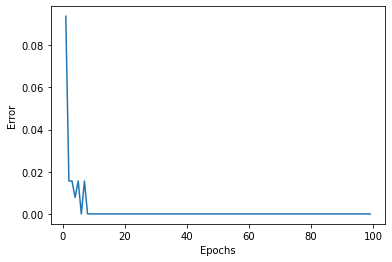

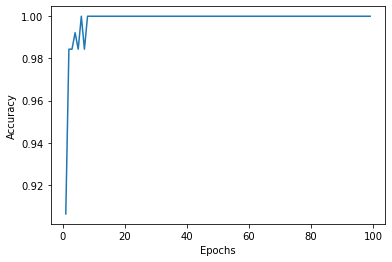

In [3]:
q = np.shape(y)[1]
M = 32 # Number of nodes

alpha = 0.5
L_arr = list(range(1,100))
err_arr = []
accuracy_arr = []

for L in L_arr:
    Wcurr, Vcurr = train(X, y, L)
    error = test(X, y, Wcurr, Vcurr)
    err_arr.append(error)
    accuracy_arr.append(1-error)    
  
plt.figure()
plt.plot(L_arr, err_arr)
plt.xlabel("Epochs")
plt.ylabel("Error")
plt.show()

plt.figure()
plt.plot(L_arr, accuracy_arr)
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.show()

Yes after about 20 epochs the error drops to 0. Or accuracy goes to near perfect. This however varies from run to run, but on average is around the 20th mark (based on several runs).

# 1c)

In [4]:
L = 100
err_total = []

for iteration in range(L):
    err_somerun = []
    for i in range(8):
        start = i*16
        end = (i+1)*16
        
        X_train = np.vstack((X[0:start, :], X[end:-1, :]))
        y_train = np.vstack((y[0:start, :], y[end:-1, :]))
        
        X_test = X[start:end, :]
        y_test = y[start:end, :]
        
        V = np.random.randn(M+1, 1)
        W = np.random.randn(p, M)
        
        W, V = train(X_train, y_train, L)
        err = test(X_test, y_test, W, V)
        
        err_somerun.append(err)
    print(" run ", iteration, "error rate: ", np.mean(err_somerun), " and accuracy rate: ", 1-np.mean(err_somerun))
    err_total.append(err_somerun)

 run  0 error rate:  0.0390625  and accuracy rate:  0.9609375
 run  1 error rate:  0.03125  and accuracy rate:  0.96875
 run  2 error rate:  0.0390625  and accuracy rate:  0.9609375
 run  3 error rate:  0.0390625  and accuracy rate:  0.9609375
 run  4 error rate:  0.03125  and accuracy rate:  0.96875
 run  5 error rate:  0.03125  and accuracy rate:  0.96875
 run  6 error rate:  0.0390625  and accuracy rate:  0.9609375
 run  7 error rate:  0.0390625  and accuracy rate:  0.9609375
 run  8 error rate:  0.0234375  and accuracy rate:  0.9765625
 run  9 error rate:  0.046875  and accuracy rate:  0.953125
 run  10 error rate:  0.03125  and accuracy rate:  0.96875
 run  11 error rate:  0.0390625  and accuracy rate:  0.9609375
 run  12 error rate:  0.03125  and accuracy rate:  0.96875
 run  13 error rate:  0.03125  and accuracy rate:  0.96875
 run  14 error rate:  0.0234375  and accuracy rate:  0.9765625
 run  15 error rate:  0.0390625  and accuracy rate:  0.9609375
 run  16 error rate:  0.0390

No. Even over 100 trials, the error rate was not 0. Thus we infer that the error rate for cross validation does not go to 0. This makes sense intuitively as the hold out set of the data could have features that the test set does not, thus leading to errors.

In [5]:
print("mean error rate over 100 iterations", np.mean(err_total))

mean error rate over 100 iterations 0.037578125


Thus we cannot achieve perfect accuracy. There is always some error. 